<a href="https://colab.research.google.com/github/sarthak-1420/Minor-Project---7th-Sem/blob/main/Minor_Project_7th_Sem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Exp1.csv')


In [4]:
df.head()

,ap,vc,f,Ra
0,0.25,350,0.07,0.391
1,0.25,350,0.07,0.359
2,0.25,350,0.07,0.421
3,0.25,350,0.07,0.450
4,0.25,350,0.07,0.360


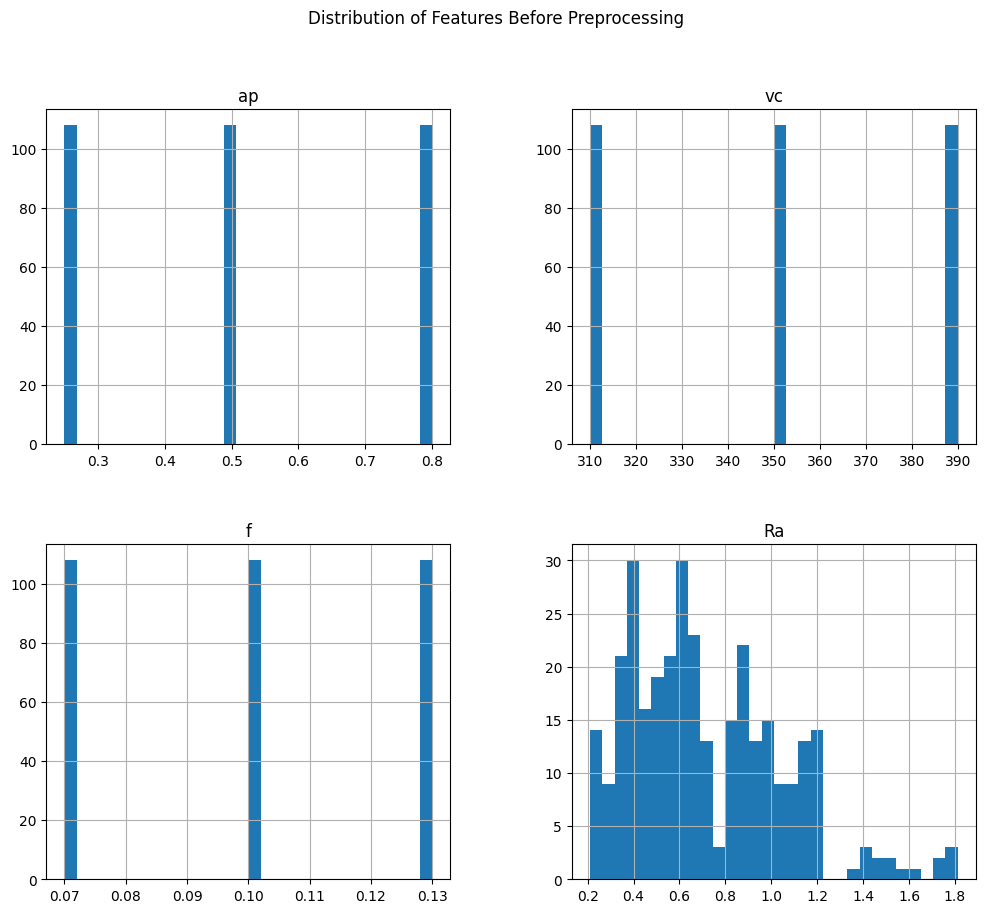

In [5]:

df.hist(bins=30, figsize=(12, 10))
plt.suptitle('Distribution of Features Before Preprocessing')
plt.show()


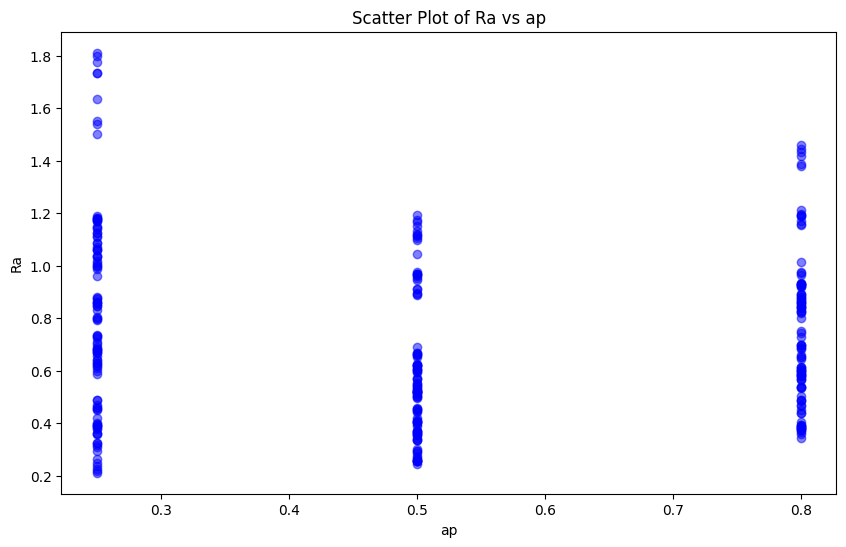

In [6]:
Depth_of_cut = df['ap']
Ra_MEAN = df['Ra']
plt.figure(figsize=(10, 6))
plt.scatter(Depth_of_cut, Ra_MEAN, color='blue', alpha=0.5)
plt.xlabel('ap')
plt.ylabel('Ra')
plt.title('Scatter Plot of Ra vs ap')
plt.show()

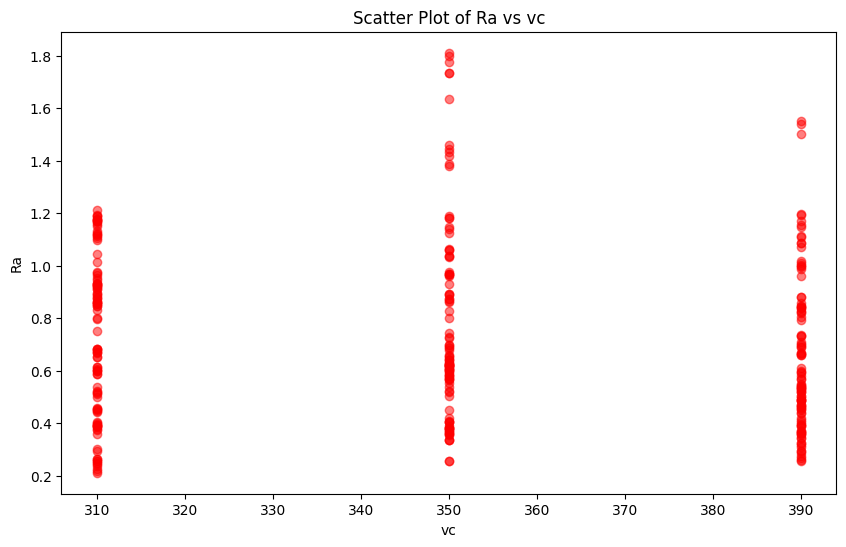

In [7]:
Cutting_speed = df['vc']
Ra_MEAN = df['Ra']
plt.figure(figsize=(10, 6))
plt.scatter(Cutting_speed, Ra_MEAN, color='red', alpha=0.5)
plt.xlabel('vc')
plt.ylabel('Ra')
plt.title('Scatter Plot of Ra vs vc')
plt.show()

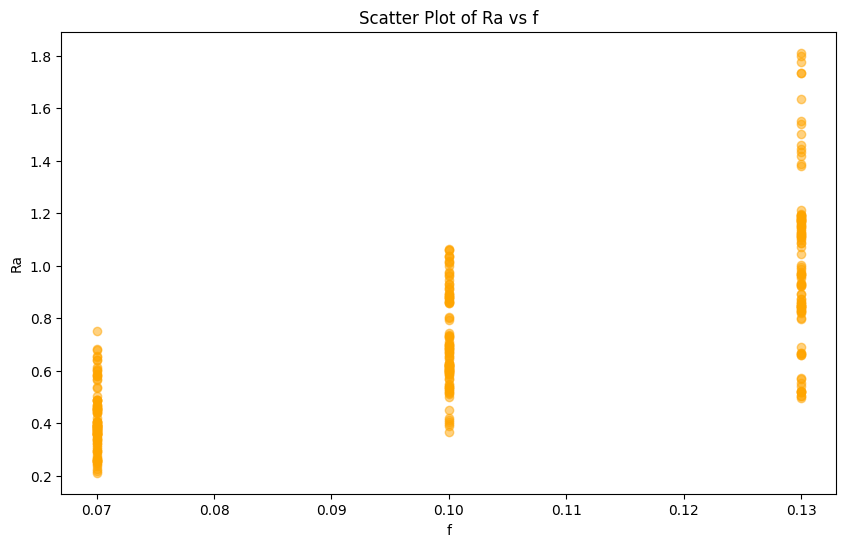

In [8]:
Feed_rate = df['f']
Ra_MEAN = df['Ra']
plt.figure(figsize=(10, 6))
plt.scatter(Feed_rate, Ra_MEAN , color='orange', alpha=0.5)
plt.xlabel('f')
plt.ylabel('Ra')
plt.title('Scatter Plot of Ra vs f')
plt.show()

In [9]:

X = df.drop(columns=['Ra'])
y = df[['Ra']]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data
X_test_scaled = scaler.transform(X_test)


In [12]:
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data
X_test_scaled = scaler.transform(X_test)


In [13]:
print("Original data")
print(X_train.head())

print("Scaled data")
print(X_train_scaled[:5])


Original data
       ap   vc     f
73   0.50  390  0.10
181  0.25  390  0.13
17   0.25  350  0.10
24   0.25  390  0.13
146  0.80  310  0.13
Scaled data
[[0.45454545 1.         0.5       ]
 [0.         1.         1.        ]
 [0.         0.5        0.5       ]
 [0.         1.         1.        ]
 [1.         0.         1.        ]]


In [14]:
from sklearn.linear_model import LinearRegression

# Example: Training a simple linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test_scaled)


In [15]:
from sklearn.metrics import mean_squared_error

# Example: Evaluating with Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.04601974070943382


In [16]:
# Example: Suppose your data is already scaled and stored in a DataFrame
# Scale your data first (if not done yet)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)

# Normalize the scaled data
normalizer = MinMaxScaler()
X_train_normalized = normalizer.fit_transform(X_train_scaled)
X_test_normalized = normalizer.transform(X_test_scaled)


In [17]:
print("Normalized Data")
print(X_train_normalized[:5])


Normalized Data
[[0.45454545 1.         0.5       ]
 [0.         1.         1.        ]
 [0.         0.5        0.5       ]
 [0.         1.         1.        ]
 [1.         0.         1.        ]]


In [18]:
from scipy import stats

# Calculate Z-scores
z_scores = np.abs(stats.zscore(X_train_normalized))

# Set a threshold (e.g., 3 standard deviations away from the mean)
threshold = 3

# Identify outliers
outliers = np.where(z_scores > threshold)

# Remove outliers
X_train_no_outliers = np.delete(X_train_normalized, outliers[0], axis=0)
y_train_no_outliers = np.delete(y_train.values, outliers[0], axis=0)  # Adjust y_train accordingly


In [19]:
# Calculate IQR
Q1 = np.percentile(X_train_normalized, 25, axis=0)
Q3 = np.percentile(X_train_normalized, 75, axis=0)
IQR = Q3 - Q1

# Calculate the bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (X_train_normalized < lower_bound) | (X_train_normalized > upper_bound)

# Remove outliers
X_train_no_outliers = X_train_normalized[~outliers.any(axis=1)]
y_train_no_outliers = y_train.values[~outliers.any(axis=1)]


In [20]:
print("Data after outlier removal")
print(X_train_no_outliers[:])


Data after outlier removal
[[0.45454545 1.         0.5       ]
 [0.         1.         1.        ]
 [0.         0.5        0.5       ]
 [0.         1.         1.        ]
 [1.         0.         1.        ]
 [0.45454545 1.         0.5       ]
 [1.         0.         0.        ]
 [0.45454545 0.         1.        ]
 [0.45454545 0.5        1.        ]
 [0.45454545 0.         0.        ]
 [1.         1.         0.5       ]
 [1.         0.5        1.        ]
 [0.45454545 1.         1.        ]
 [0.         0.         0.        ]
 [0.45454545 0.5        0.        ]
 [0.         1.         0.        ]
 [0.45454545 0.         0.5       ]
 [0.         1.         1.        ]
 [1.         1.         0.        ]
 [0.45454545 0.         1.        ]
 [0.45454545 1.         1.        ]
 [1.         1.         1.        ]
 [0.45454545 0.         0.        ]
 [1.         1.         1.        ]
 [0.         0.5        1.        ]
 [0.         0.         0.5       ]
 [0.         1.         0.        ]
 

In [21]:
# Convert the processed data back to DataFrame for visualization
X_processed_df = pd.DataFrame(X_train_normalized, columns=X.columns)


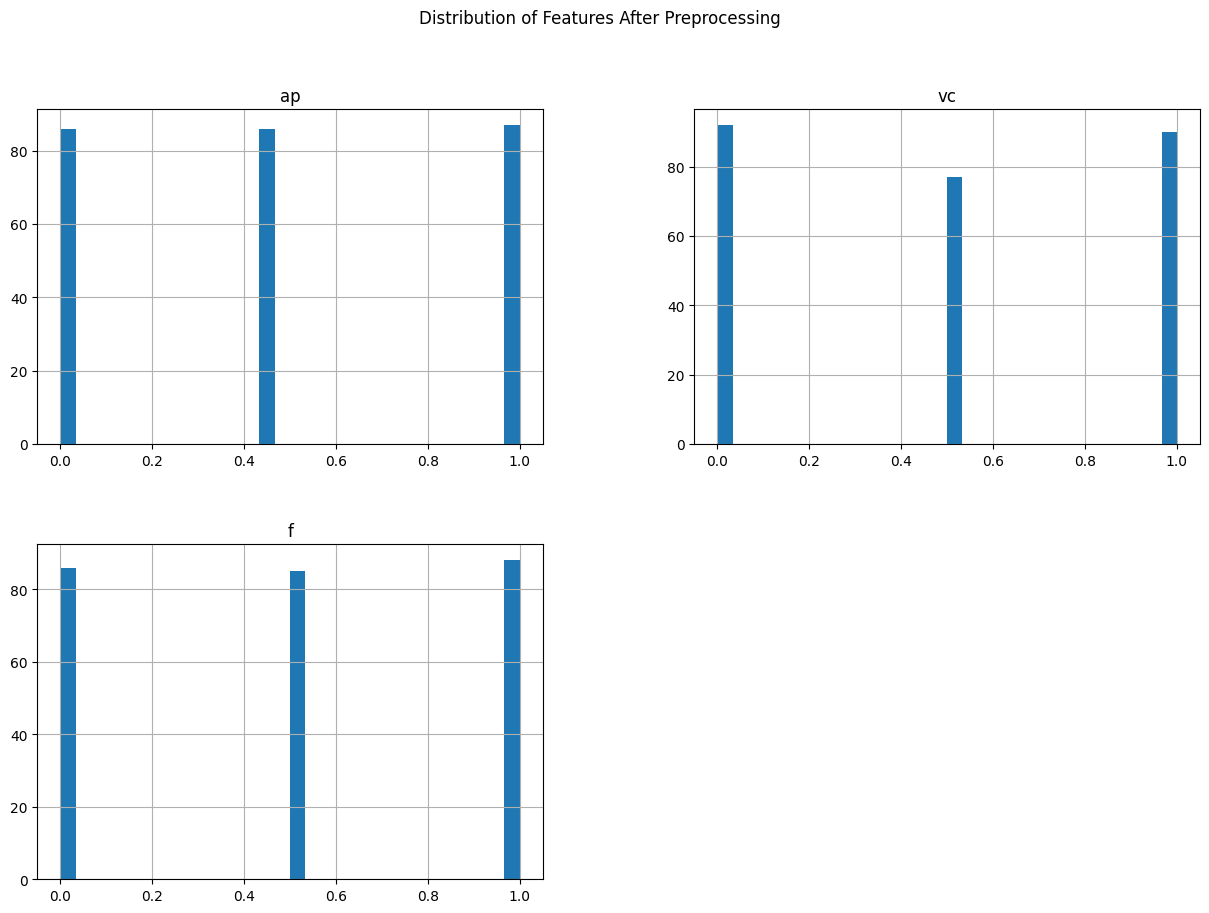

In [22]:
# Plot histograms for each feature in the processed dataset
X_processed_df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribution of Features After Preprocessing')
plt.show()


In [23]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


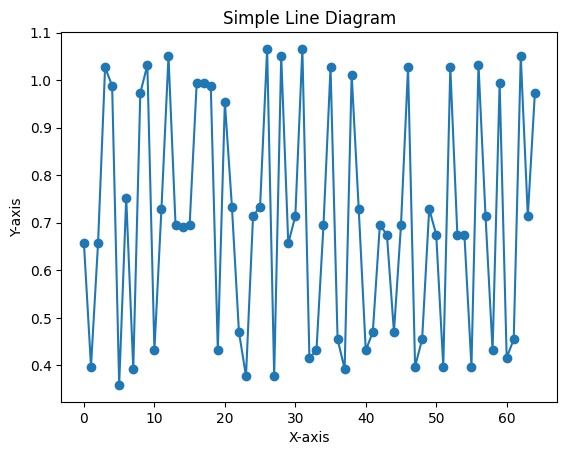

In [24]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train_normalized, y_train)

# Predict on the test set
y_pred_lr = model.predict(X_test_normalized)

plt.plot(y_pred, marker='o')
plt.title("Simple Line Diagram")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Display the plot
plt.show()


In [46]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 0.04601974070943382
R² Score: 0.6202093178289293


In [47]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train_normalized, y_train, cv=5, scoring='r2')
print(f'Cross-Validation R² Scores: {cv_scores}')
print(f'Mean R² Score: {cv_scores.mean()}')

Cross-Validation R² Scores: [0.63848675 0.54061421 0.4871441  0.70512804 0.39211943]
Mean R² Score: 0.5526985053115718


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score


In [49]:
# Initialize the Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha value as needed

# Train the model on the training data
ridge_model.fit(X_train_normalized, y_train)

# Predict on the test set
y_pred_ridge = ridge_model.predict(X_test_normalized)
print(y_pred_ridge)
# Evaluate the Ridge model's performance
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression Mean Squared Error: {mse_ridge}")
print(f"Ridge Regression R² Score: {r2_ridge}")

[0.65786952 0.40459241 0.65786952 1.02018372 0.9822939  0.36670258
 0.75178959 0.39996001 0.96717688 1.02481612 0.43784984 0.72901678
 1.04295654 0.69575935 0.69112695 0.69575935 0.98692629 0.98692629
 0.9822939  0.43784984 0.94903646 0.73364918 0.47573967 0.384843
 0.71389977 0.73364918 1.05807355 0.384843   1.04295654 0.65786952
 0.71389977 1.05807355 0.42273282 0.43784984 0.69575935 1.02018372
 0.46062265 0.39996001 1.00506671 0.72901678 0.43784984 0.47573967
 0.69575935 0.67600994 0.47573967 0.69575935 1.02018372 0.40459241
 0.46062265 0.72901678 0.67600994 0.40459241 1.02018372 0.67600994
 0.67600994 0.40459241 1.02481612 0.71389977 0.43784984 0.98692629
 0.42273282 0.46062265 1.04295654 0.71389977 0.96717688]
Ridge Regression Mean Squared Error: 0.046422369568775046
Ridge Regression R² Score: 0.6168865114246851


In [50]:
# Import the necessary class
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators

# Train the model on the training data
rf_model.fit(X_train_normalized, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_normalized)

In [51]:
# Evaluate the model's performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regression Mean Squared Error: {mse_rf}")
print(f"Random Forest Regression R² Score: {r2_rf}")


Random Forest Regression Mean Squared Error: 0.02213718848442613
Random Forest Regression R² Score: 0.8173067082464835


In [52]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X_train_normalized, y_train, cv=5, scoring='r2')
print(f'Cross-Validation R² Scores: {cv_scores}')
print(f'Mean R² Score: {cv_scores.mean()}')

Cross-Validation R² Scores: [0.81260539 0.62345081 0.73799243 0.63302154 0.70841077]
Mean R² Score: 0.7030961859886905


In [57]:
from sklearn.ensemble import GradientBoostingRegressor

In [59]:
# Fix y_train shape
y_train = y_train.ravel()

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model on the training data
gb_model.fit(X_train_normalized, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test_normalized)

In [56]:
# Evaluate the model's performance
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Regression Mean Squared Error: {mse_gb}")
print(f"Gradient Boosting Regression R² Score: {r2_gb}")


Gradient Boosting Regression Mean Squared Error: 0.024539760940311305
Gradient Boosting Regression R² Score: 0.797478812262728


In [60]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(gb_model, X_train_normalized, y_train, cv=5, scoring='r2')
print(f'Cross-Validation R² Scores: {cv_scores}')
print(f'Mean R² Score: {cv_scores.mean()}')

Cross-Validation R² Scores: [0.7984045  0.62157381 0.72218666 0.70009041 0.67001286]
Mean R² Score: 0.7024536496838133


In [61]:
from sklearn.neighbors import KNeighborsRegressor

In [62]:
# Initialize the KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=50)  # You can adjust n_neighbors

# Train the model on the training data
knn_model.fit(X_train_normalized, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test_normalized)


In [63]:
# Evaluate the model's performance
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"K-Nearest Neighbors Regression Mean Squared Error: {mse_knn}")
print(f"K-Nearest Neighbors Regression R² Score: {r2_knn}")


K-Nearest Neighbors Regression Mean Squared Error: 0.0449974300676923
K-Nearest Neighbors Regression R² Score: 0.6286462201241689


In [64]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(knn_model, X_train_normalized, y_train, cv=5, scoring='r2')
print(f'Cross-Validation R² Scores: {cv_scores}')
print(f'Mean R² Score: {cv_scores.mean()}')


Cross-Validation R² Scores: [0.50515809 0.45885039 0.47532314 0.66851127 0.49731181]
Mean R² Score: 0.5210309422624675


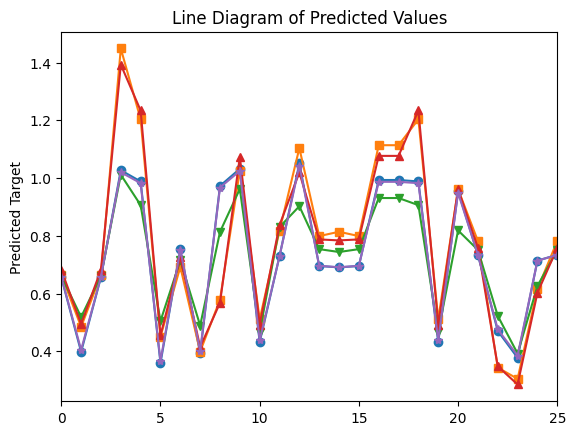

In [40]:
plt.plot(y_pred_lr, marker='o')
plt.plot(y_pred_rf, marker='s')
plt.plot(y_pred_knn, marker='v')
plt.plot(y_pred_gb, marker='^')
plt.plot(y_pred_ridge,marker='*')
plt.xlim(0, 25)
plt.title("Line Diagram of Predicted Values")
plt.xlabel("")
plt.ylabel("Predicted Target")
plt.show()


/tmp/ipython-input-2202278784.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


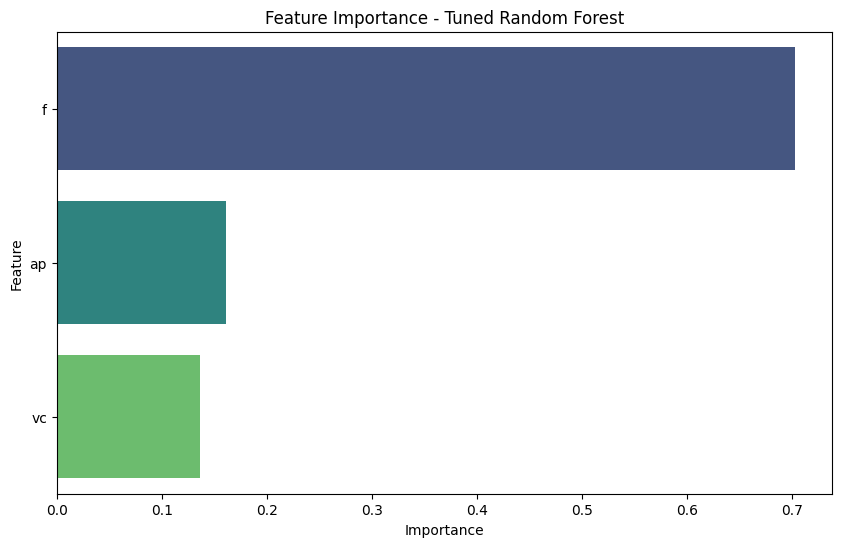

In [ ]:
# Feature Importance for Tuned Random Forest
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title("Feature Importance - Tuned Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()